<a href="https://colab.research.google.com/github/wanfadly97/fyp/blob/main/scattering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pwd

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import re
import string
import nltk
#Import Bokeh
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool


# Load the data
df = pd.read_csv('C:\\Users\\user\\Desktop\\KEJA PALI\\fyp\\FoodData.csv')

# Display a sample of five rows
display(df.sample(5))

# Counts of product types
df.Group.value_counts()

,Class,Type,Group,Food,Allergy
18,Plant origin,Vegetable,Composite vegetable,Burdock,Ragweed Allergy
113,Plant origin,Cereal grain and pulse,Pulse,Peanut,Peanut Allergy
9,Plant origin,Cereal grain and pulse,Pulse,Bean,Legume Allergy
99,Plant origin,Oil,Oil,Mustard oil,NaN
160,Plant origin,Oil,Oil,Sunflower oil,NaN


Cruciferous vegetable         15
Pulse                         13
Fish                          12
Dairy                         11
Oil seed                      10
Tropical fruit                10
Oil                           10
Offal                          9
Cereal grain                   8
Cucurbitaceous vegetable       7
Composite vegetable            7
Liliaceous vegetable           7
Stone fruit                    7
Sugar source                   6
Berry                          6
Pome fruit                     5
Potato                         5
Umbelliferous vegetable        5
Citrus fruit / citric acid     5
Miscellaneous vegetable        4
Legumes vegetable              3
Solanceous vegetable           3
Beverage seed                  2
Shellfish                      2
Herb                           2
Mushroom                       2
Bee product                    2
Mineral water                  1
Hop                            1
Egg                            1
Spice     

In [ ]:
# embedding each ingredients
ingredient_idx = {}
corpus = []
idx = 0
ingredients = df['Group'].astype(str)
for i in range(len(df)):
        ingreds = ingredients[i]
        #convert ingredient column into lowercase
        ingreds = ingreds.lower()
        #split sentences by symbols
        tokens=re.split(' | |; |, |\*|\n| ,',ingreds)
        table = str.maketrans('', '', string.punctuation)
        tokens = [w.translate(table) for w in tokens]

         #filter out numbers in words
        tokens = [word for word in tokens if word.isalpha()]
        # filter out stop words
        from nltk.corpus import stopwords
        stop_words = set(stopwords.words('english'))
        tokens = [w for w in tokens if not w in stop_words]

        # filter out common words
        common_words = {"enriched", "following", "ingredients", "meal", "natural","wax","lake", "concentrated" }
        tokens = [w for w in tokens if not w in common_words]
        corpus.append(tokens)
        for ingredient in tokens:
            if ingredient not in ingredient_idx:
                ingredient_idx[ingredient] = idx
                idx += 1

In [ ]:
# Get the number of items and tokens
M = len(df)                 # The number of the items
N = len(ingredient_idx)     # The number of the ingredients
print(corpus)
# Initialize a matrix of zeros
A = np.zeros(shape = (M, N))

[['oil', 'seed'], ['pome', 'fruit'], ['stone', 'fruit'], ['composite', 'vegetable'], ['liliaceous', 'vegetable'], ['tropical', 'fruit'], ['miscellaneous', 'vegetable'], ['tropical', 'fruit'], ['cereal', 'grain'], ['pulse'], ['berry'], ['pulse'], ['berry'], ['fish'], ['pulse'], ['cruciferous', 'vegetable'], ['cruciferous', 'vegetable'], ['cereal', 'grain'], ['composite', 'vegetable'], ['dairy'], ['pulse'], ['dairy'], ['mushroom'], ['cruciferous', 'vegetable'], ['beverage', 'seed'], ['oil'], ['umbelliferous', 'vegetable'], ['dairy'], ['offal'], ['cruciferous', 'vegetable'], ['umbelliferous', 'vegetable'], ['dairy'], ['stone', 'fruit'], ['oil', 'seed'], ['offal'], ['composite', 'vegetable'], ['cruciferous', 'vegetable'], ['oil'], ['beverage', 'seed'], ['cereal', 'grain'], ['oil'], ['oil', 'seed'], ['berry'], ['dairy'], ['shellfish'], ['cucurbitaceous', 'vegetable'], ['dairy'], ['tropical', 'fruit'], ['offal'], ['offal'], ['fish'], ['solanceous', 'vegetable'], ['egg'], ['composite', 'veget

In [ ]:
corpus

[['oil', 'seed'],
 ['pome', 'fruit'],
 ['stone', 'fruit'],
 ['composite', 'vegetable'],
 ['liliaceous', 'vegetable'],
 ['tropical', 'fruit'],
 ['miscellaneous', 'vegetable'],
 ['tropical', 'fruit'],
 ['cereal', 'grain'],
 ['pulse'],
 ['berry'],
 ['pulse'],
 ['berry'],
 ['fish'],
 ['pulse'],
 ['cruciferous', 'vegetable'],
 ['cruciferous', 'vegetable'],
 ['cereal', 'grain'],
 ['composite', 'vegetable'],
 ['dairy'],
 ['pulse'],
 ['dairy'],
 ['mushroom'],
 ['cruciferous', 'vegetable'],
 ['beverage', 'seed'],
 ['oil'],
 ['umbelliferous', 'vegetable'],
 ['dairy'],
 ['offal'],
 ['cruciferous', 'vegetable'],
 ['umbelliferous', 'vegetable'],
 ['dairy'],
 ['stone', 'fruit'],
 ['oil', 'seed'],
 ['offal'],
 ['composite', 'vegetable'],
 ['cruciferous', 'vegetable'],
 ['oil'],
 ['beverage', 'seed'],
 ['cereal', 'grain'],
 ['oil'],
 ['oil', 'seed'],
 ['berry'],
 ['dairy'],
 ['shellfish'],
 ['cucurbitaceous', 'vegetable'],
 ['dairy'],
 ['tropical', 'fruit'],
 ['offal'],
 ['offal'],
 ['fish'],
 ['solan

In [ ]:
# Define the oh_encoder function
def oh_encoder(tokens):
    x = np.zeros(N)
    for t in tokens:
            # Get the index for each ingredient
            idx = ingredient_idx[t]
            # Put 1 at the corresponding indices
            x[idx] = 1
    return x

In [ ]:
# Make a document-term matrix
i = 0
for tokens in corpus:
    A[i, :] = oh_encoder(tokens)
    i += 1
# Dimension reduction with t-SNE
model = TSNE(n_components = 2, learning_rate = 20)
tsne_features = model.fit_transform(A)

# Make X, Y columns
df['X'] = tsne_features[:, 0]
df['Y'] = tsne_features[:, 1]

In [ ]:
# Import TSNE
from sklearn.manifold import TSNE
#Import Matplotlib
import matplotlib.pyplot as plt
#Import Bokeh
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
# Import KMeans
from sklearn.cluster import KMeans
output_notebook()

Loading BokehJS ...

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=33)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

In [ ]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=33)

# Fit model to points
model.fit(A)

# Determine the cluster labels of new_points: labels
labels = model.predict(A)

# Print cluster labels of new_points
print(labels)

[ 3 16 11 15 12  2 18  2  8  4 13  4 13  6  4  7  7  8 15  9  4  9 24  7
 26 22 14  9  0  7 14  9 11  3  0 15  7 22 26  8 22  3 13  9 23  1  9  2
  0  0  6 17 32 15 10 12  1 18  3  6 10  0 30  5 22 21 22  2 20 28  0  6
  7 13  9 16  2 11  7 21  2 19  7 10 12  5  4 15  4  5 16  6  1  2  1  9
 27 14 11 22  7 11 12 18 22 12  5  5  2 14 14  2 11  4 16 21  4  3  4 25
  6  0  2  8 19 11  1  7 16  7  7  3 13  8 22 20  8  3  6 15 31  6  6  3
 12  0 23 24 15  9  4 25 18  1 13 10 10 10  4  4 22  3  8 17 19 19 29  6
 17  6  6  0  7  7 22  3  1  7 12  8  9  4 19  9]


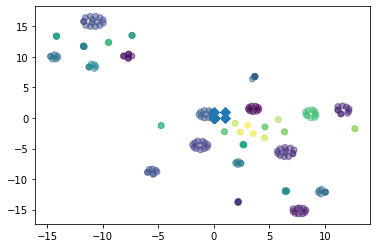

In [ ]:
# Assign the columns of new_points: xs and ys
xs = tsne_features[:,0]
ys = tsne_features[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50)
plt.show()

In [ ]:
#Import Bokeh
from bokeh.io import show, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
output_notebook()

In [ ]:
# Make a source and a scatter plot
source = ColumnDataSource(df)
plot = figure(x_axis_label = 'T-SNE 1',
              y_axis_label = 'T-SNE 2', 
              width = 500, height = 400)
plot.circle(x = 'X', 
            y = 'Y', 
            source = source, 
            size = 10, color = '#FF7373', alpha = .8)

GlyphRenderer(id='1038', ...)

In [ ]:
plot.background_fill_color = "beige"
plot.background_fill_alpha = 0.2

# add hover tool
hover = HoverTool(tooltips = [
        ('Food', '@Food'),
        ('Type', '@Type'),('Allergy', '@Allergy'),('Group', '@Group')])
plot.add_tools(hover)

In [ ]:
# Plot the map
show(plot)

In [ ]:
#cosine similaritu
df_2 = df[df.Group == 'Oil seed'].reset_index().drop('index', axis = 1)
df_2['dist'] = 0.0

myItem = df_2[df_2.Food.str.contains('Almond')]
myItem

,Class,Type,Group,Food,Allergy,X,Y,dist
0,Plant origin,Nut and seed,Oil seed,Almond,Nut Allergy,12.166602,1.490848,0.0


In [ ]:
# getting the array for myItem
P1 = np.array([myItem.X.values, myItem.Y.values]).reshape(1, -1)
P1

array([[12.166602 ,  1.4908476]], dtype=float32)

In [ ]:
# cosine similarities with other items
for i in range(len(df_2)):
    P2 = np.array([df_2['X'][i], df_2['Y'][i]]).reshape(-1, 1)
    df_2.dist[i] = (P1 * P2).sum() / (np.sqrt(np.sum(P1))*np.sqrt(np.sum(P2)))

<ipython-input-18-f10769f4a713>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2.dist[i] = (P1 * P2).sum() / (np.sqrt(np.sum(P1))*np.sqrt(np.sum(P2)))


In [ ]:
#5 food that related with myItem
df_2 = df_2.sort_values('dist')
df_2[['Food', 'Group','Allergy','Type','dist']].head(5)

,Food,Group,Allergy,Type,dist
3,Ginkgo nut,Oil seed,Nut Allergy,Nut and seed,12.862020
9,Walnut,Oil seed,Nut Allergy,Nut and seed,12.862020
6,Safflower seed,Oil seed,Seed Allergy,Nut and seed,13.051617
7,Sesame seed,Oil seed,Seed Allergy,Nut and seed,13.051617
4,Pecan,Oil seed,Nut Allergy,Nut and seed,13.226375
